# パーセプトロンの実装

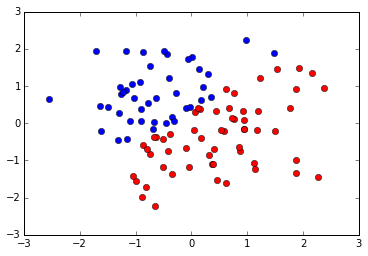

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
np.random.seed(0)

def phi(x, y):
    return np.array([x, y, 1])

def h(x, y):
    return -3 * x + 3 * y - 1

N = 100
X = np.random.randn(N, 2)
T = np.array([1 if h(x, y) > 0 else -1 for x, y in X])
plt.plot(X[:,0][T == 1], X[:,1][T == 1], 'bo')
plt.plot(X[:,0][T == -1], X[:,1][T == -1], 'ro')

In [2]:
import random
w = np.zeros(3)
while True:
    misses = 0
    x = [i for i in range(N)]
    random.shuffle(x)
    for n in x:
        x_n, y_n = X[n]
        t_n = T[n]
        predict = np.sign((w * phi(x_n, y_n)).sum())
        if predict != t_n:
            w += t_n * phi(x_n, y_n)
            misses += 1
    if misses == 0:
        break
print(w)

[-5.42142248  5.5886289  -2.        ]


/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


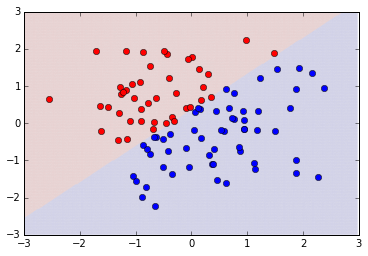

In [3]:
seq = np.arange(-3, 3, 0.02)
xlist, ylist = np.meshgrid(seq, seq)
zlist = np.array([np.sign((w * phi(x, y)).sum()) for x, y in zip(xlist, ylist)])
plt.pcolor(xlist, ylist, zlist, alpha=0.2, edgecolors='white')
plt.plot(X[T== 1,0], X[T== 1,1], 'o', color='red')
plt.plot(X[T==-1,0], X[T==-1,1], 'o', color='blue')
plt.show()

# ロジスティック回帰の実装

In [11]:
TT = [1 if h(*x) > 0 else 0 for x in X]

In [17]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))


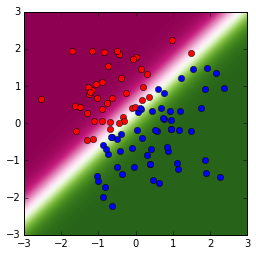

In [24]:
eta = 0.1
w = np.zeros(3)

for i in range(50):
    x = [i for i in range(N)]
    random.shuffle(x)
    for n in x:
        x_n, y_n = X[n]
        t_n = TT[n]
        feature = phi(x_n, y_n)
        predict = sigmoid(np.inner(w, feature))
        w -= eta * (predict - t_n) * feature
    eta *= 0.9
    
seq = np.arange(-3, 3, 0.01)
xlist, ylist = np.meshgrid(seq, seq)
zlist = [sigmoid(np.inner(w, phi(x, y))) for x, y in zip(xlist, ylist)]

# 散布図と予測分布を描画
plt.imshow(zlist, extent=[-3,3,-3,3], origin='lower', cmap=plt.cm.PiYG_r)
plt.plot(X[T==1,0], X[T==1,1], 'o', color='red')
plt.plot(X[T==-1,0], X[T==-1,1], 'o', color='blue')
plt.show()

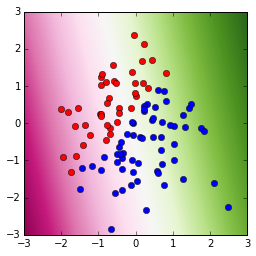

In [27]:
eta = 0.1
w = np.zeros(3)


def g(x, y):
    return -3 * x**2 + 3 * x + 3 * y - 1

N = 100
X = np.random.randn(N, 2)
T = np.array([1 if h(x, y) > 0 else -1 for x, y in X])

for i in range(50):
    x = [i for i in range(N)]
    random.shuffle(x)
    for n in x:
        x_n, y_n = X[n]
        t_n = TT[n]
        feature = phi(x_n, y_n)
        predict = sigmoid(np.inner(w, feature))
        w -= eta * (predict - t_n) * feature
    eta *= 0.9
    
seq = np.arange(-3, 3, 0.01)
xlist, ylist = np.meshgrid(seq, seq)
zlist = [sigmoid(np.inner(w, phi(x, y))) for x, y in zip(xlist, ylist)]

# 散布図と予測分布を描画
plt.imshow(zlist, extent=[-3,3,-3,3], origin='lower', cmap=plt.cm.PiYG_r)
plt.plot(X[T==1,0], X[T==1,1], 'o', color='red')
plt.plot(X[T==-1,0], X[T==-1,1], 'o', color='blue')
plt.show()

結局、非線形分離問題を扱えるかどうかは、関数 $\phi$ の取り方に依っている。結局、モデルとしては単純パーセプトロンと等価である。